<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S9_C1_PLN_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Iván Andrés Trujillo Abella


# ivantrujillo1229@gmail.com

In [1]:
import pandas as pd

In [2]:
# Sirve para trabajar con texto en español
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 47.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# MiniReto: Agrupar las letras de las canciones por género

In [3]:
url  = "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrics-label.txt"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyrics  208 non-null    object
 1   label   208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


# Pruebas individuales

* Bajar texto a  minúscula
* Eliminar saltos de líneas (\n)
* Eliminar conectores
* Eliminar palabras específicas (bis)

In [4]:
df['lyrics'][85]

'\nSiento tu amor frente a mi\ncomo el marino que regresa al puerto\ncomo estudiante en su desespero\ncuando en vacaciones a su pueblo va\n\nllega en busca de su amor\nallí lo espera su novia querida\nese anhelo tengo yo\ny así te siento amor de mi vida (bis)\n\nSi el caudaloso río, trata de salvar sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n\nSiento tu amor frente a mi\ncomo las aves que cruzan los cielos\nque ya cansadas de su largo vuelo\nbuscan los árboles para dormir\n\nLlevan calor a sus hijos\npa protegerlos del hambre y del frío\ny yo buscare a tu lado\nla protección del amor mío (bis)\n\nSi el caudaloso río, trata de salvar sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\ny así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n'

# Pruebas individuales

<.lower()>
* Bajar texto a  minúscula
* Eliminar conectores

<re.sub>
* Eliminar palabras específicas (bis)
* Eliminar saltos de líneas (\n)

In [5]:
import re
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [6]:
texto_prueba = "Liceo\nComo es estudiante\nya se  Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."

In [7]:
texto_minus = texto_prueba.lower()
## Reemplaza un salto de línea
# Eliminar los espacios dobles
texto_procesado =  re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
texto_procesado =  re.sub(r"\s*\(bis\)",'',texto_procesado) ###
texto_procesado

'liceo como es estudiante ya se escalona pero de recuerdo te dejó un paseo que te habla...'

In [8]:
def pre_clean(texto_prueba):
  texto_minus = texto_prueba.lower()
  ## Reemplaza un salto de línea
  # Eliminar los espacios dobles
  texto_procesado =  re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
  texto_procesado =  re.sub(r"\s*\(bis\)",'',texto_procesado)
  return texto_procesado

In [9]:
nlp = spacy.load('es_core_news_sm')

In [10]:
def clean_text(text):
  text = nlp(text)
  text = ' '.join([token.lemma_ for token in text if not token.is_stop and not token.is_punct])
  return text

In [11]:
texto_prueba = "Liceo\nComo es estudiante\nya se  Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."

In [12]:
clean_text(texto_prueba)

'Liceo \n estudiante \n   Escalona \n recuerdo paseo bis \n\n'

In [13]:
clean_text(texto_procesado)

'liceo estudiante escalonar recuerdo paseo'

In [14]:
texto2 = "sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n"
texto2

'sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n'

In [15]:
texto_temp = pre_clean(texto2)
texto_temp

'sus aguas buscando recorridos que sena menos dolorosos y así lo mas bonito seria la unión de nosotros encontrar con tu amor, la salvación de mi alma '

In [16]:
texto_fin = clean_text(texto_temp)
texto_fin

'agua buscar recorrido senar doloroso bonito serio unión encontrar amor salvación alma'

# Parte 1. Limpieza de la columna lyrics

In [17]:
df['lyrics_clean'] = df['lyrics'].apply(lambda x : clean_text(pre_clean(x)))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lyrics        208 non-null    object
 1   label         208 non-null    object
 2   lyrics_clean  208 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


In [19]:
df['lyrics'][68]

'tanto como yo te he prometido\nque soy tuyo sólo tuyo maye\ny no quiere creer en mis promesas\nsabes que tu eres todo mi idilio\nque mi amor es perdurable maye\ny me hieres con tu indiferencia\n\n\nhasta cuando piensas martirizarme\ncon el maltrato de tu rebeldía (bis)\nyo te seguiré adorando y te seguiré esperando\nhasta lograr en la vida las aspiraciones mías..\n\nPero espera que el tiempo te lo dirá\ny saldrás de la duda que tienes tu (bis)\nyo te doy un amor con sinceridad\ny sigues todavía con tu ingratitud (bis)\n\nI I\n\npiensa que yo te sigo esperando\nhasta que tu te decidas maye\ny te probaré que soy sincero\ntodo lo que te digo en mi canto\nte lo probaré con hechos maye\nporque tu eres todo mi desvelo\n\npor mi palabra de honor te lo juro\ndoy mi palabra de honor que te quiero (bis)\nya te lo he dicho mil veces que soy tuyo sólo tuyo\ny si tu no te dedices yo me quedaré soltero..\n\nmi palabra es sagrada como la luz\nque ilumina el pecebre del niño Dios (bis)\ncuando dejes 

In [20]:
df['lyrics_clean'][68]

'prometer maye creer promesa idilio amor perdurable maye hier indiferencia   pensar martirizar yo maltrato rebeldía seguir adorar seguir esperar lograr vida aspiración esperar tiempo decir saldrás duda tener dar amor sinceridad sigues  ingratitud i i pensar seguir esperar decir maye probar sincero decir canto probar hecho maye desvelo palabra honor jurar dar palabra honor querer mil dedicser quedar soltero palabra sagrar luz iluminar pecebre niño dio dej duda tener va feliz'

In [21]:
df['lyrics_clean'][78]

'mujer poner celoso guapo componer canción pa muchacha ejemplo poner brava compusar paseo rosalba déjate cosa estate tranquilo cambiar vida malo cantar él labio rojo pecar mirar lindo ojo malo cantar él labio rojo pecar mirar lindo ojo cantar necesitar querer quieres beso déjate cosa estate tranquilo cambiar vida déjate cosa estate tranquilo cambiar vida'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lyrics_clean']).toarray()

In [23]:
words = vectorizer.get_feature_names_out()
words = pd.DataFrame(words)
words.head(50)

,0
0,039
1,12
2,16
3,2x
4,45
5,abajo
6,abandonado
7,abandonar
8,abarguir
9,aber


In [24]:
x_df = pd.DataFrame(X)
x_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.11589,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.109008,0.0,0.00000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.110237,0.0,0.00000,0.0,0.0,0.074862
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.052691,0.0,0.00000,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084184,...,0.0,0.0,0.0,0.0,0.123963,0.0,0.00000,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.070285,0.0,0.00000,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.069149,0.0,0.00000,0.0,0.0,0.000000


In [25]:
x_df.shape

(208, 3654)

Hasta aquí la clase S8_C5

Se continua en S9_C1

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
from sklearn.decomposition import PCA
# Reduce dimensionaity to three!
features = X.copy()
pca = PCA(n_components=2, random_state=42) # reduce el enfoque a dos porque se arupan por texto y no por palabras
X = pca.fit_transform(X)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
# Encontrar el número óptimo de clústeres usando el método del codo
def find_optimal_clusters(data, max_k):
    inertias = []
    sil_scores = []
    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
        sil_scores.append(silhouette_score(data, model.labels_))
    return inertias, sil_scores

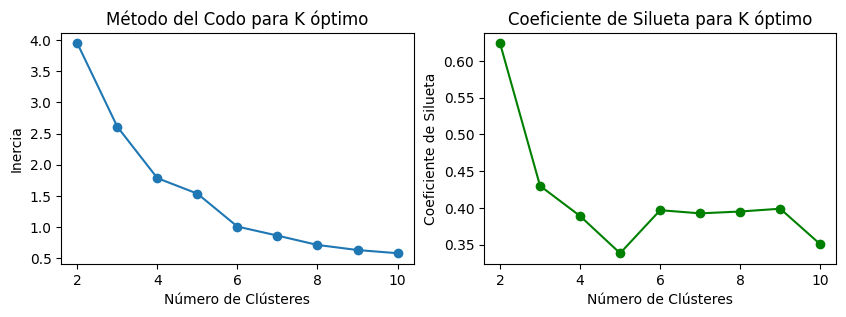

In [30]:
max_k =10
inertias, sil_scores =  find_optimal_clusters(X, max_k)

# Visualizar el método del codo
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), inertias, marker='o')
plt.title('Método del Codo para K óptimo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), sil_scores, marker='o', color='green')
plt.title('Coeficiente de Silueta para K óptimo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.show()

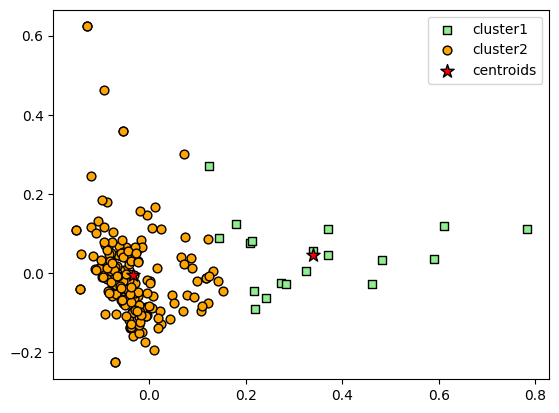

In [31]:
km = KMeans(n_clusters = 2,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
#plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [32]:
Cluster = km.labels_
Cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lyrics        208 non-null    object
 1   label         208 non-null    object
 2   lyrics_clean  208 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


In [38]:
lyrics_type_cluster = pd.DataFrame({'Lyrics': df['lyrics_clean'], 'Cluster': Cluster, 'Etiqueta': df['label']})
lyrics_type_cluster.head(10)

,Lyrics,Cluster,Etiqueta
0,oir morenita ir quedar anoche radio abrir lice...,1,Vallenato
1,hacertir casa aire pa´que vivo poner letrero n...,1,Vallenato
2,lejana sabana manaure bonita sabana manaurera ...,1,Vallenato
3,óyelo rafo pa villa hacer carta pa dín luz fro...,1,Vallenato
4,píntamir golondrina decir pintor llevá pico es...,1,Vallenato
5,caminar tierra mar llegare encontrar algun l...,1,Vallenato
6,conocer mañana conocer mañana avión tierra pre...,1,Vallenato
7,antioqueño serrania allar cali encontrar ver v...,1,Vallenato
8,amigo amar alma ay hombe recordar jaime molina...,1,Vallenato
9,señor contar él encanto sabana señor contar ...,1,Vallenato


In [39]:
n_clusters = 3
for cluster in range (n_clusters):
  print(f"Cluster {cluster}")
  print(lyrics_type_cluster[lyrics_type_cluster['Cluster'] == cluster]['Etiqueta'].value_counts())


Cluster 0
Etiqueta
Ranchera     11
Vallenato     8
Name: count, dtype: int64
Cluster 1
Etiqueta
Ranchera     95
Vallenato    94
Name: count, dtype: int64
Cluster 2
Series([], Name: count, dtype: int64)


In [42]:
n_clusters = 2
for cluster in range (n_clusters):
  print(f"Cluster {cluster}")
  print(lyrics_type_cluster[lyrics_type_cluster['Cluster'] == cluster]['Lyrics'])


Cluster 0
28     hijo querer venir endulzar vida madre querido ...
42     lugar traer recuerdo enguayar destruir sentimi...
57     dio tierra amigo amigo andar aire dio tierra a...
65     ay dejar terminar aguacero ver agua correr ay ...
73     ay asegurar don fidel pensar pobre dinero dar ...
84     ay regresa compañerita soledad sentir tristeza...
98     tar presente ten presente llevar imagen grabad...
101    poder alzar vuelo alzar vuelo cóndor volar alt...
108    enamorado correspond ventana escucha esconder ...
115    aventurero muchacho simpatico dicharachero ena...
122    dinero mundo dinero maldito valer mirar sonrei...
127    mirar lindo ojo mirar lindo forma decir ay cha...
129    venir andar conceder volver afigurar volver pa...
160    miré estaba bonito sensual imaginer ajena ay a...
182    sierra morén cielito lindo venir bajar par oji...
187    noche ir puro llorar dormir ir puro tomar jura...
196    uya bonito zacateca señor ojo verde andar pase...
198    morir enterrar

In [43]:
C0 = lyrics_type_cluster[lyrics_type_cluster['Cluster'] == 0]['Lyrics']
C0

,Lyrics
28,hijo querer venir endulzar vida madre querido ...
42,lugar traer recuerdo enguayar destruir sentimi...
57,dio tierra amigo amigo andar aire dio tierra a...
65,ay dejar terminar aguacero ver agua correr ay ...
73,ay asegurar don fidel pensar pobre dinero dar ...
84,ay regresa compañerita soledad sentir tristeza...
98,tar presente ten presente llevar imagen grabad...
101,poder alzar vuelo alzar vuelo cóndor volar alt...
108,enamorado correspond ventana escucha esconder ...
115,aventurero muchacho simpatico dicharachero ena...
